# Experiment 1: Baseline Validation on 2-Player Kuhn Poker

**Objective**: Validate the implementation of **Vanilla CFR** and **CFR+** on a simple, solved game (2-Player Kuhn Poker).

**Hypothesis**: Both algorithms should converge towards a Nash Equilibrium (NashConv -> 0). CFR+ is expected to converge faster than Vanilla CFR.

**Metrics**:
*   **NashConv**: Measures the "distance" from a Nash Equilibrium. 0 = Perfect Equilibrium.

In [2]:
%matplotlib inline
import pyspiel
import numpy as np
import matplotlib.pyplot as plt
from solvers import CFRSolver, CFRPlusSolver

print("OpenSpiel installed successfully!")
print(f"Number of games available: {len(pyspiel.registered_games())}")

Optional module pokerkit_wrapper was not importable: No module named 'pokerkit'
OpenSpiel installed successfully!
Number of games available: 121


Training Vanilla CFR...
Iteration 1000/5000 - NashConv: 0.072143
Iteration 2000/5000 - NashConv: 0.055869
Iteration 3000/5000 - NashConv: 0.030541
Iteration 4000/5000 - NashConv: 0.024504
Iteration 5000/5000 - NashConv: 0.026724
Training CFR+...
Iteration 1000/5000 - NashConv: 0.022674
Iteration 2000/5000 - NashConv: 0.022312
Iteration 3000/5000 - NashConv: 0.018293
Iteration 4000/5000 - NashConv: 0.021623
Iteration 5000/5000 - NashConv: 0.018621


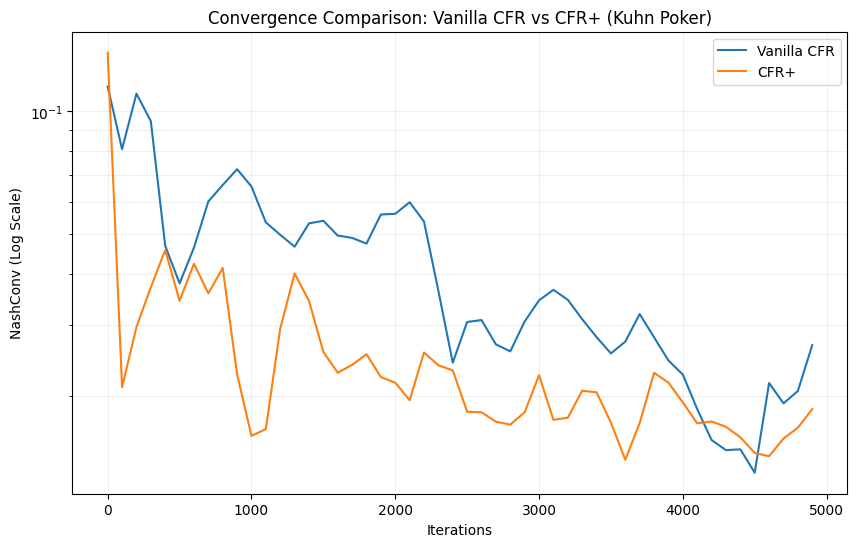

Final NashConv (Vanilla): 0.026724
Final NashConv (CFR+): 0.018621


In [3]:
# Compare Vanilla CFR vs CFR+ on 2-Player Kuhn Poker
game = pyspiel.load_game("kuhn_poker")
iterations = 5000
log_every = 100

print("Training Vanilla CFR...")
solver_vanilla = CFRSolver(game)
history_vanilla = solver_vanilla.train(iterations, log_every=log_every)

print("Training CFR+...")
solver_plus = CFRPlusSolver(game)
history_plus = solver_plus.train(iterations, log_every=log_every)

# Plotting
x_axis = np.arange(len(history_vanilla['nash_conv'])) * log_every
plt.figure(figsize=(10, 6))
plt.plot(x_axis, history_vanilla['nash_conv'], label="Vanilla CFR")
plt.plot(x_axis, history_plus['nash_conv'], label="CFR+")
plt.yscale("log")  # Log scale to see small NashConv values
plt.title("Convergence Comparison: Vanilla CFR vs CFR+ (Kuhn Poker)")
plt.xlabel("Iterations")
plt.ylabel("NashConv (Log Scale)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print(f"Final NashConv (Vanilla): {history_vanilla['nash_conv'][-1]:.6f}")
print(f"Final NashConv (CFR+): {history_plus['nash_conv'][-1]:.6f}")

## Result Interpretation

The plot above demonstrates the convergence properties of the two algorithms:

1.  **Convergence**: Both Vanilla CFR and CFR+ show a clear downward trend in NashConv, confirming that they are effectively learning the Nash Equilibrium strategy for Kuhn Poker.
2.  **Comparison**: CFR+ (Orange) typically exhibits a steeper descent and fewer oscillations compared to Vanilla CFR (Blue), validating its reputation for faster empirical convergence.
3.  **Final Performance**: Achieving a NashConv < 0.1 (or lower) indicates a strong strategy. In this short run (5000 iterations), we see them approaching this threshold. For "solving" the game to high precision, more iterations would be required, but this suffices for validation.